In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import auxiliary as auxi
from sklearn.cluster import KMeans
from geopy.distance import geodesic

### Read train data and test data

In [4]:
df_train = pd.read_csv("train.csv")
print('Number of train records: {}'.format(len(df_train)))
df_train.head()

Number of train records: 60000


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [5]:
df_test = pd.read_csv("test.csv")
print('Number of test records: {}'.format(len(df_test)))
df_test.head()

Number of test records: 30000


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region


# 1. sg-stock-prices

## 1.1 Read stock price data

In [6]:
df_stock = pd.read_csv("auxiliary-data/sg-stock-prices.csv")
print('Number of stock records: {}'.format(len(df_stock)))
df_stock.head()

Number of stock records: 35498


,name,symbol,date,open,high,low,close,adjusted_close
0,DBS Group,D05.SI,2021-01-04,25.13,25.34,25.01,25.34,22.833
1,DBS Group,D05.SI,2021-01-05,25.22,25.35,25.09,25.35,22.842
2,DBS Group,D05.SI,2021-01-06,25.30,25.35,25.07,25.18,22.689
3,DBS Group,D05.SI,2021-01-07,25.68,26.18,25.63,26.05,23.473
4,DBS Group,D05.SI,2021-01-08,26.55,27.47,26.50,27.42,24.707


## 1.2 Validate complete coverage of year-month

In [7]:
auxi.is_full_coverage(df_stock, df_train, df_test)

Date in stock data covers all in train data? False
Date in stock data covers all in test data? False


## 1.3 Get average adjusted close price for each year-month

In [8]:
df_stock = auxi.get_avg_adjusted_close(df_stock)
df_stock.head()

,date,adjusted_close
0,2020-12,33.827600
1,2021-01,12.332232
2,2021-02,13.822067
3,2021-03,13.250911
4,2021-04,14.085999


## 1.4 Add in new column "avg_stock_price" for train and test data

In [9]:
auxi.insert_col_stock_price(df_stock, df_train)
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,avg_stock_price
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,15.448564
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,10.278250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,8.983589
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,15.318542
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,9.137518


In [10]:
auxi.insert_col_stock_price(df_stock, df_test)
df_test.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,avg_stock_price
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,9.668867
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,9.344795
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,9.276715
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,15.318542
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,11.224848


# 2. sg-shopping-malls

## 2.1 Read shopping mall data

In [11]:
df_shopping_malls = pd.read_csv("auxiliary-data/sg-shopping-malls.csv")
df_shopping_malls = df_shopping_malls.drop('name', axis=1)
df_shopping_malls.head()

,latitude,longitude
0,1.274588,103.843471
1,1.301385,103.837684
2,1.310867,103.863930
3,1.325596,103.842572
4,1.298141,103.855635


## 2.2 Plot shopping mall and train data on map

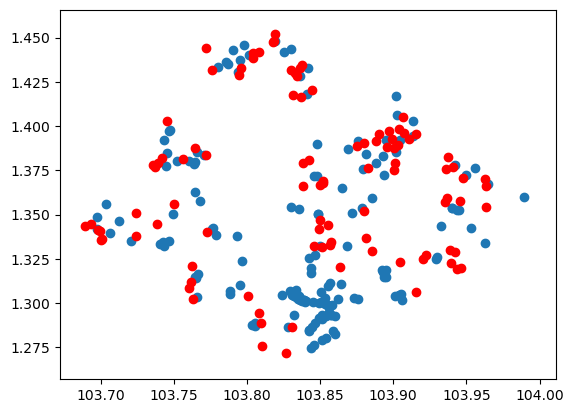

In [12]:
plt.scatter(df_shopping_malls['longitude'], df_shopping_malls['latitude'])
plt.scatter(df_train[:100]['longitude'], df_train[:100]['latitude'], color='r')
plt.show()

## 2.3 Perform K-Means clustering on shopping malls

In [13]:
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(df_shopping_malls)

/home/navdev2/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=14, random_state=42)

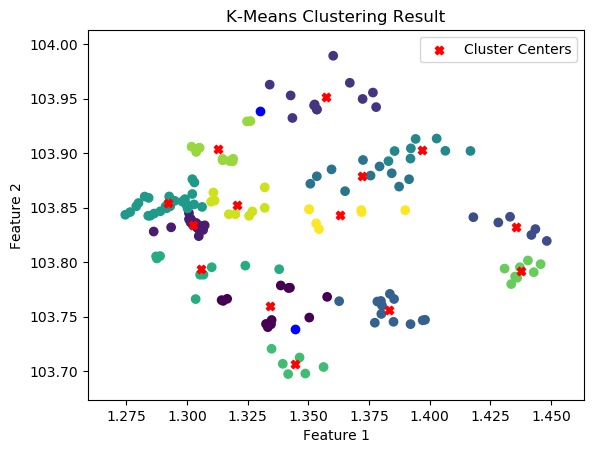

In [14]:
# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
# Visualize the clustering result
plt.scatter(df_shopping_malls['latitude'], df_shopping_malls['longitude'], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', label='Cluster Centers')
plt.scatter(df_train[:2]['latitude'], df_train[:2]['longitude'], color='b')
plt.title('K-Means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 2.4 Naive way of processing shopping mall counting

In [15]:
%%time
num_list_ground_truth = auxi.num_shopping_malls_df(df_train[:5000], df_shopping_malls)

CPU times: user 1min 20s, sys: 0 ns, total: 1min 20s
Wall time: 1min 20s


/home/navdev2/Documents/5228-group21-project/auxiliary.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_shopping_malls'] = num_list


## 2.5 KMeans Clutering approach of finding number of shopping malls

In [16]:
%%time
num_list_k_means = auxi.num_shopping_malls_df_Kmeans(df_train[:5000], df_shopping_malls)

/home/navdev2/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 17.6 s, sys: 10.1 ms, total: 17.6 s
Wall time: 17.4 s


/home/navdev2/Documents/5228-group21-project/auxiliary.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_shopping_malls'] = num_list


In [17]:
%%time
num_list_k_means_2 = auxi.num_shopping_malls_df_Kmeans(df_train[:5000], df_shopping_malls, k=2)

/home/navdev2/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 11.8 s, sys: 11.3 ms, total: 11.8 s
Wall time: 11.7 s


/home/navdev2/Documents/5228-group21-project/auxiliary.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_shopping_malls'] = num_list


In [18]:
def find_abs_diff(list1, list2):
    return np.sum(np.array(list1) - np.array(list2))
print("Difference of ground truth and k=3 clustering: {}".format(find_abs_diff(num_list_ground_truth, num_list_k_means[:5000])))
print("Difference of ground truth and k=2 clustering: {}".format(find_abs_diff(num_list_ground_truth, num_list_k_means_2)))

Difference of ground truth and k=3 clustering: 0
Difference of ground truth and k=2 clustering: 450


In [19]:
%%time
num_list_k_means = auxi.num_shopping_malls_df_Kmeans(df_train, df_shopping_malls)
df_train.head()

/home/navdev2/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 3min 23s, sys: 24.2 ms, total: 3min 23s
Wall time: 3min 23s


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,avg_stock_price,num_shopping_malls
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,15.448564,5
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,10.278250,3
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,8.983589,5
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,15.318542,3
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,9.137518,6


In [20]:
%%time
num_list_k_means = auxi.num_shopping_malls_df_Kmeans(df_test, df_shopping_malls)
df_test.head()

/home/navdev2/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 1min 41s, sys: 11.8 ms, total: 1min 41s
Wall time: 1min 40s


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,avg_stock_price,num_shopping_malls
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,9.668867,3
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,9.344795,3
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,9.276715,4
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,15.318542,4
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,11.224848,5


# 3. sg-mrt-existing-stations

## 3.1 Read existing mrt stations data

In [21]:
df_mrt = pd.read_csv("auxiliary-data/sg-mrt-existing-stations.csv")
print('Number of mrt station records: {}'.format(len(df_mrt)))
df_mrt.head()

Number of mrt station records: 162


,code,name,opening_year,latitude,longitude
0,NS1,Jurong East,1990,1.333295,103.742154
1,NS2,Bukit Batok,1990,1.349035,103.749526
2,NS3,Bukit Gombak,1990,1.358663,103.751913
3,NS4,Choa Chu Kang,1990,1.385363,103.744371
4,NS5,Yew Tee,1996,1.397476,103.747418


## 3.2 Calculate the distance (km) to the nearest mrt station

In [ ]:
df_train['min_distance'] = df_train.apply(lambda row: auxi.calculate_min_distance(row, df_mrt), axis=1)
df_train.head()

In [ ]:
df_test['min_distance'] = df_test.apply(lambda row: auxi.calculate_min_distance(row, df_mrt), axis=1)
df_test.head()

In [ ]:
# Final step: export processed train data and test data to auxi .csv files (For EDA)
df_train.to_csv("train_auxi.csv", index=False)
df_test.to_csv("test_auxi.csv", index=False)